# 1. Contextualização
## 1.1. Metas e objetivos
## 1.2. Estrutura do dataset

|Coluna|Descrição|
|---|---|
|``dtRef``|Data de referência da extração dos dados|
|``Id``|Identificador único da transação|
|``Data``|Data da transação|
|``Produto``|Nome do produto|
|``Categoria``|Categoria do produto|
|``Quantidade``|Quantidade vendida na transação|
|``Preço``|Preço do produto|

# 2. Preparação do ambiente
## 2.1. Importação das bibliotecas e carregamento dos dados

In [74]:
# Manipulação dos dados
import pandas as pd
import numpy as np
import datetime as dt
import sqlalchemy

# EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações do notebook
import warnings
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fast')
blue_palette = ['#003f5c', '#665191', '#a05195', '#d45087', '#f95d6a', '#ff7c43', '#ffa600']
sns.set_palette(blue_palette)
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', None)

In [22]:
engine = sqlalchemy.create_engine('sqlite:///../data/database.db')

with open ('query.sql', 'r') as open_file:
    query = open_file.read()

In [23]:
df = pd.read_sql(query, engine)

## Qualidade dos dados

In [24]:
print(f"O dataset contém {df.shape[0]} linhas e {df.shape[1]} colunas.")

O dataset contém 5000 linhas e 7 colunas.


In [25]:
print(f"O dataset possui: {len(df.select_dtypes(include = 'object').columns.to_list())} colunas categóricas.")
print(f"O dataset possui: {len(df.select_dtypes(include = 'number').columns.to_list())} colunas numéricas.")

O dataset possui: 4 colunas categóricas.
O dataset possui: 3 colunas numéricas.


In [26]:
print(f"O dataset possui {df.duplicated().sum()} dados duplicados.")

O dataset possui 0 dados duplicados.


In [27]:
print(f"O dataset possui {df.isnull().sum().sum()} dados nulos.")

O dataset possui 0 dados nulos.


In [28]:
for col in df.columns:
    print(df[col].name)
    print(df[col].unique())
    print('=' * 50)

dtRef
['2024-11-20']
Id
[   1    2    3 ... 4998 4999 5000]
Data
['2023-09-06' '2023-02-13' '2023-01-10' '2023-10-15' '2023-04-17'
 '2023-04-06' '2023-03-28' '2023-02-24' '2023-10-14' '2023-02-09'
 '2023-09-20' '2023-12-13' '2023-07-31' '2023-02-03' '2023-08-18'
 '2023-06-13' '2023-01-13' '2023-01-12' '2023-02-06' '2023-03-26'
 '2023-04-01' '2023-07-16' '2023-08-22' '2023-01-11' '2023-08-06'
 '2023-03-19' '2023-10-06' '2023-09-10' '2023-09-30' '2023-06-12'
 '2023-03-27' '2023-06-24' '2023-08-17' '2023-04-19' '2023-11-11'
 '2023-12-04' '2023-01-03' '2023-10-22' '2023-11-09' '2023-03-04'
 '2023-09-29' '2023-06-14' '2023-05-13' '2023-04-18' '2023-03-02'
 '2023-03-25' '2023-10-24' '2023-05-11' '2023-05-28' '2023-02-07'
 '2023-05-20' '2023-11-26' '2023-05-14' '2023-08-23' '2023-04-13'
 '2023-11-10' '2023-01-17' '2023-10-11' '2023-06-28' '2023-07-28'
 '2023-02-18' '2023-12-25' '2023-01-31' '2023-08-03' '2023-04-24'
 '2023-11-19' '2023-09-02' '2023-08-29' '2023-12-10' '2023-12-01'
 '2023-05-2

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dtRef       5000 non-null   object 
 1   Id          5000 non-null   int64  
 2   Data        5000 non-null   object 
 3   Produto     5000 non-null   object 
 4   Categoria   5000 non-null   object 
 5   Quantidade  5000 non-null   int64  
 6   Preço       5000 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 273.6+ KB


In [30]:
df.head()

,dtRef,Id,Data,Produto,Categoria,Quantidade,Preço
0,2024-11-20,1,2023-09-06,BASIC Notebook,Laptop,1,1817.51
1,2024-11-20,2,2023-02-13,MOBA Setup,Desktop,1,3785.69
2,2024-11-20,3,2023-01-10,BASIC Notebook,Laptop,1,2273.69
3,2024-11-20,4,2023-10-15,BASIC Notebook,Laptop,1,2213.34
4,2024-11-20,5,2023-04-17,Mouse,Periféricos,4,27.80


### Manipulação e limpeza dos dados

Será necessário mudar o tipos dos dados nas colunas `dtRef` e `Data` para o tipo datetime. Além de criar uma coluna para mês, para plots relacionados as vendas mensais mais a frente.

In [78]:
df.dtRef = pd.to_datetime(df.dtRef, format = '%Y-%m-%d')
df.Data = pd.to_datetime(df.Data, format = '%Y-%m-%d')
df["Mes"] = df["Data"].dt.strftime('%Y-%m')

In [79]:
df.head()

,dtRef,Id,Data,Produto,Categoria,Quantidade,Preço,Mes
0,2024-11-20,1,2023-09-06,BASIC Notebook,Laptop,1,1817.51,2023-09
1,2024-11-20,2,2023-02-13,MOBA Setup,Desktop,1,3785.69,2023-02
2,2024-11-20,3,2023-01-10,BASIC Notebook,Laptop,1,2273.69,2023-01
3,2024-11-20,4,2023-10-15,BASIC Notebook,Laptop,1,2213.34,2023-10
4,2024-11-20,5,2023-04-17,Mouse,Periféricos,4,27.80,2023-04


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dtRef       5000 non-null   datetime64[ns]
 1   Id          5000 non-null   int64         
 2   Data        5000 non-null   datetime64[ns]
 3   Produto     5000 non-null   object        
 4   Categoria   5000 non-null   object        
 5   Quantidade  5000 non-null   int64         
 6   Preço       5000 non-null   float64       
 7   Mes         5000 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(2), object(3)
memory usage: 312.6+ KB


# 3. Análise Exploratória dos Dados
## 3.1. Estatísticas descritivas

In [41]:
df.select_dtypes(include = 'number').describe().T

,count,mean,std,min,25%,50%,75%,max
Id,5000.0,2500.500000,1443.520003,1.00,1250.75,2500.500,3750.2500,5000.00
Quantidade,5000.0,1.277600,0.838021,1.00,1.00,1.000,1.0000,5.00
Preço,5000.0,4365.198856,5720.251818,11.37,359.57,2413.175,5792.8875,29995.35


Em relação o Preço uma média maior que a mediana indicada uma assimétria a direita, em relação a Quantidade boa parte das compras realizadas são de somente 1 unidade. 

In [42]:
df.select_dtypes(include = 'object').describe().T

,count,unique,top,freq
Produto,5000,12,BASIC Notebook,593
Categoria,5000,3,Laptop,1754


O Produto mais vendido entre os 12 disponíveis é o **BASIC Notebook** com 593 unidades vendidas, a Categoria mais popular é a de **Laptops** com 1754 vendas no total. 

## 3.2. Explorando as features

In [47]:
df.Produto.value_counts()

Produto
BASIC Notebook       593
GAMER Notebook       581
HOME OFFICE Setup    581
PRO Notebook         580
GAMER Setup          545
MOBA Setup           528
Headset              277
Teclado              276
Mouse                272
Joystick             262
Adaptador Wi-Fi      261
Webcam               244
Name: count, dtype: int64

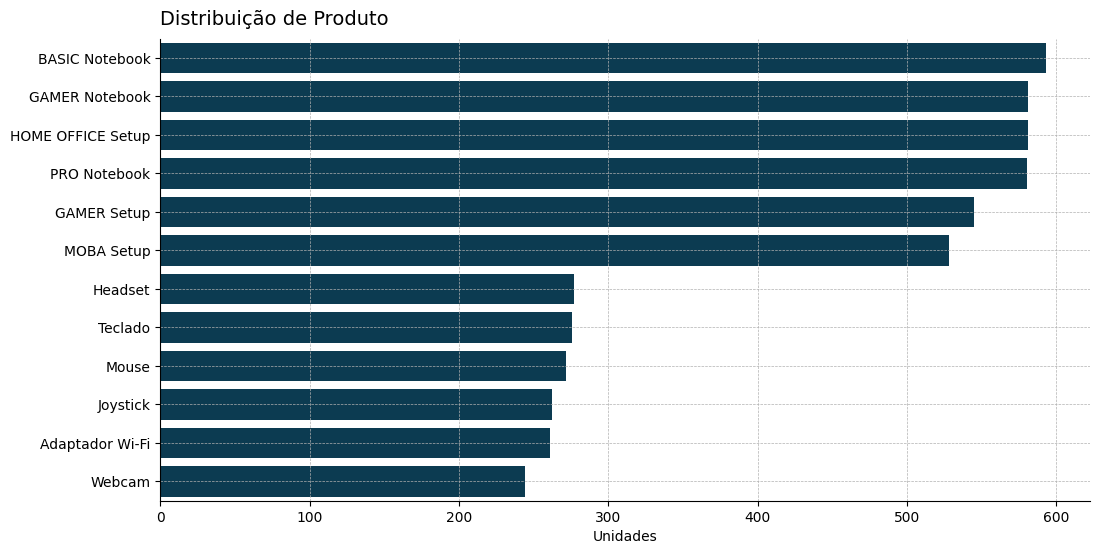

In [66]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.barplot(df.Produto.value_counts(), orient = 'h')
ax.set_title("Distribuição de Produto", loc = 'left', fontsize = 14, pad = 10)
ax.set_xlabel("Unidades", fontsize = 10)
ax.set_ylabel("")
ax.grid(True, linestyle = '--', linewidth = 0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [68]:
df.Categoria.value_counts()

Categoria
Laptop         1754
Desktop        1654
Periféricos    1592
Name: count, dtype: int64

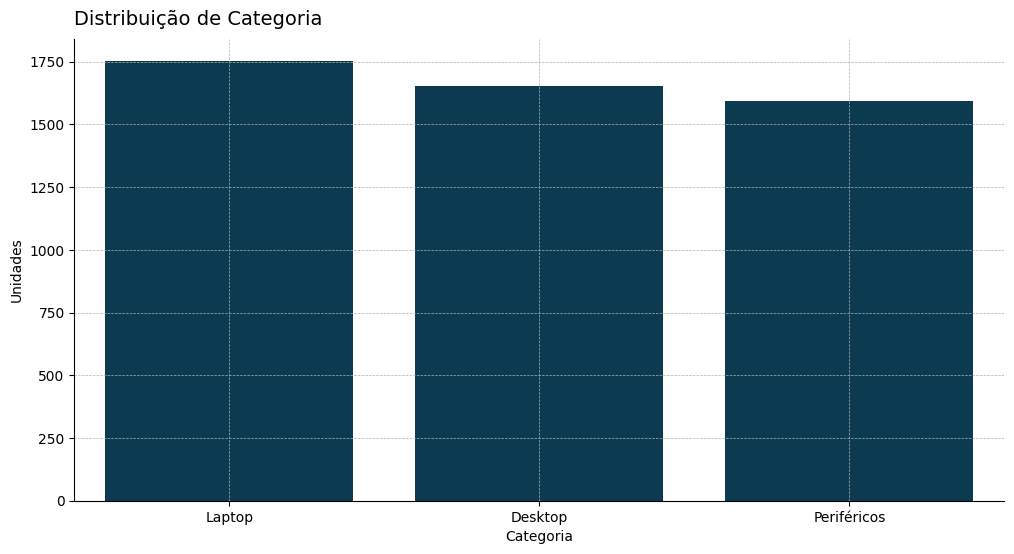

In [71]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.barplot(df.Categoria.value_counts())
ax.set_title("Distribuição de Categoria", loc = 'left', fontsize = 14, pad = 10)
ax.set_xlabel("Categoria", fontsize = 10)
ax.set_ylabel("Unidades", fontsize = 10)
ax.grid(True, linestyle = '--', linewidth = 0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [72]:
df.Quantidade.value_counts()

Quantidade
1    4392
3     192
2     182
5     120
4     114
Name: count, dtype: int64

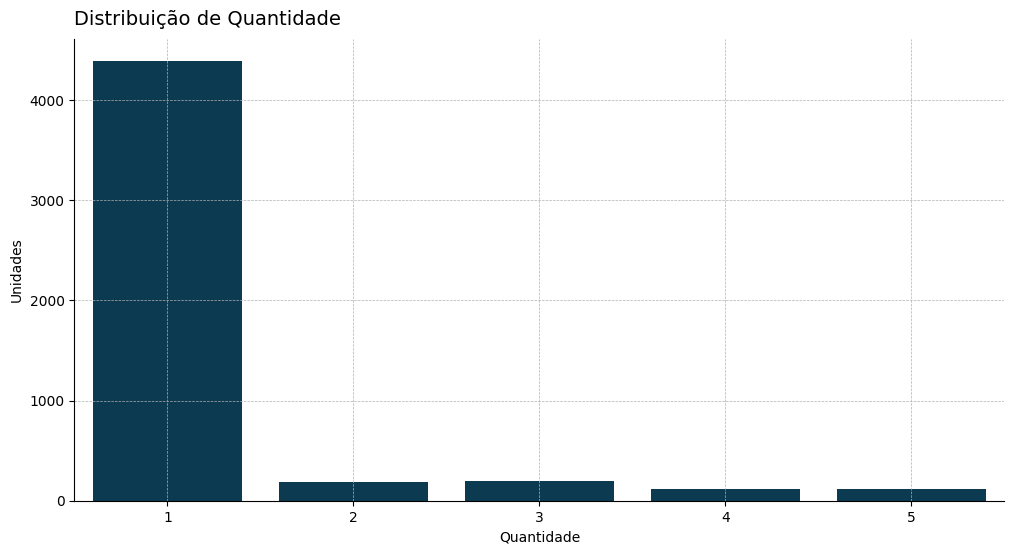

In [73]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.barplot(df.Quantidade.value_counts())
ax.set_title("Distribuição de Quantidade", loc = 'left', fontsize = 14, pad = 10)
ax.set_xlabel("Quantidade", fontsize = 10)
ax.set_ylabel("Unidades", fontsize = 10)
ax.grid(True, linestyle = '--', linewidth = 0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

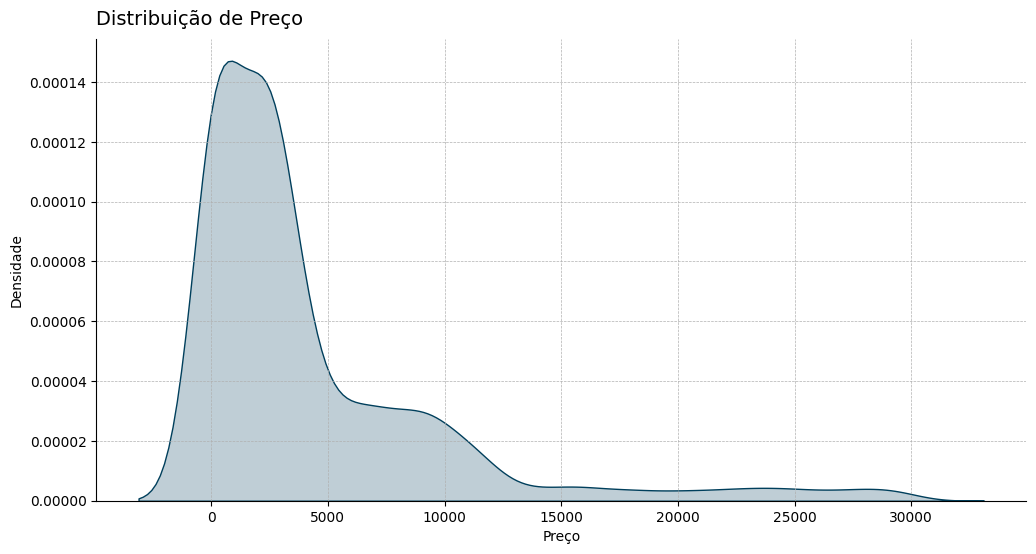

In [83]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.kdeplot(df.Preço, fill = True)
ax.set_title("Distribuição de Preço", loc = 'left', fontsize = 14, pad = 10)
ax.set_xlabel("Preço", fontsize = 10)
ax.set_ylabel("Densidade", fontsize = 10)
ax.grid(True, linestyle = '--', linewidth = 0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [103]:
df.Data.value_counts().describe().round(2)

count    364.00
mean      13.74
std        3.68
min        3.00
25%       11.00
50%       14.00
75%       16.00
max       25.00
Name: count, dtype: float64

A distribuição das vendas segue uma curva aproximadamente normal. Na média são vendidos 14 produtos por dia, com picos de 25 em um único dia e mínimo de 3 vendas. 

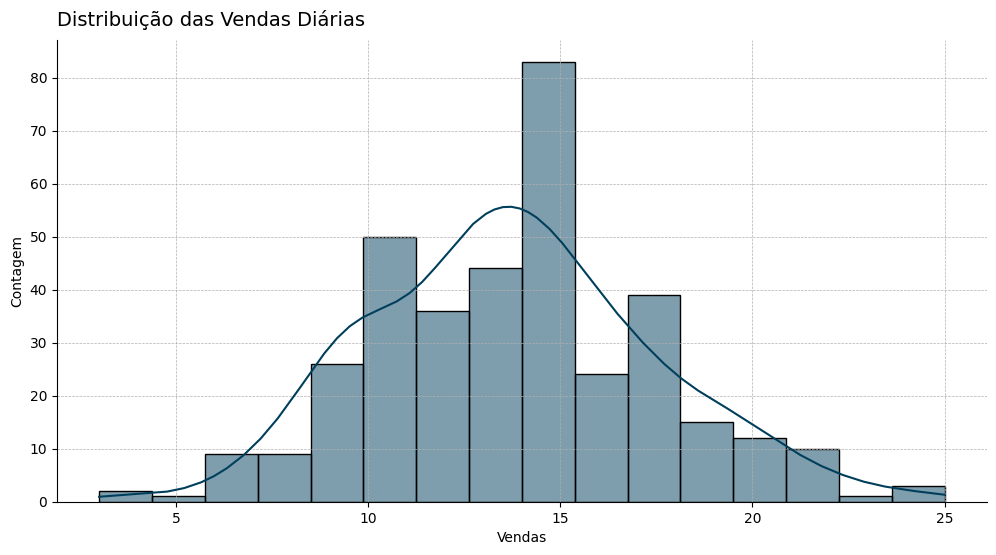

In [116]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.histplot(df.Data.value_counts(), kde = True)
ax.set_title("Distribuição das Vendas Diárias", loc = 'left', fontsize = 14, pad = 10)
ax.set_xlabel("Vendas", fontsize = 10)
ax.set_ylabel("Contagem", fontsize = 10)
ax.grid(True, linestyle = '--', linewidth = 0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

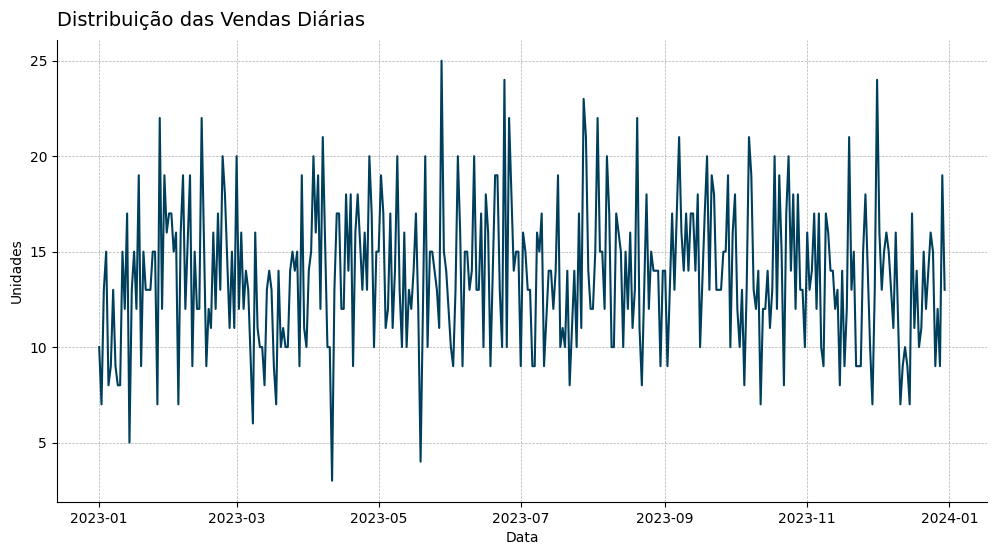

In [117]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.lineplot(df.Data.value_counts())
ax.set_title("Distribuição das Vendas Diárias", loc = 'left', fontsize = 14, pad = 10)
ax.set_xlabel("Data", fontsize = 10)
ax.set_ylabel("Unidades", fontsize = 10)
ax.grid(True, linestyle = '--', linewidth = 0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [127]:
df_mensal = df.groupby("Mes").agg(Vendas = ('Id', 'count'), Faturamento = ('Preço', 'sum')).reset_index()
df_mensal

,Mes,Vendas,Faturamento
0,2023-01,394,1629018.78
1,2023-02,399,2029829.60
2,2023-03,376,1606011.96
3,2023-04,437,1998708.81
4,2023-05,434,1703224.36
5,2023-06,443,2190388.93
6,2023-07,412,1755737.51
7,2023-08,438,1732561.11
8,2023-09,457,2013238.86
9,2023-10,431,1869897.94


In [150]:
df_data = df.groupby("Data").agg(Vendas = ('Id', 'count'),Faturamento = ('Preço', 'sum')).reset_index()
df_data

,Data,Vendas,Faturamento
0,2023-01-01,10,36513.41
1,2023-01-02,7,33067.27
2,2023-01-03,13,48082.00
3,2023-01-04,15,90449.25
4,2023-01-05,8,8737.50
...,...,...,...
359,2023-12-26,9,16851.97
360,2023-12-27,12,69153.78
361,2023-12-28,9,26191.33
362,2023-12-29,19,70427.05


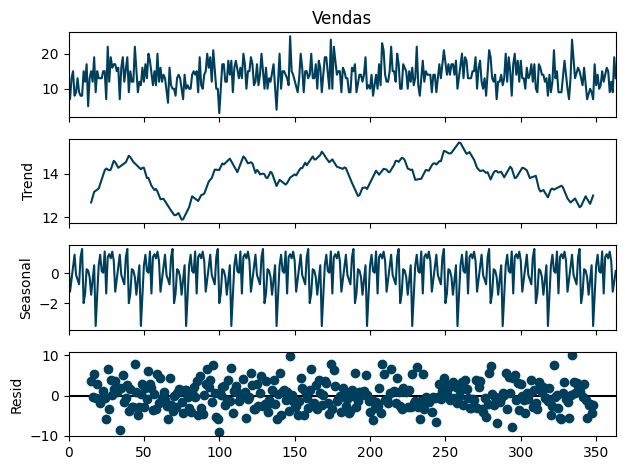

In [156]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposicao = seasonal_decompose(df_data['Vendas'], period = 30)
decomposicao.plot()
plt.show()